In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
df = pd.read_csv('data/original_responses/dietary_decision_results_Yashraj_J_Deshmukh.csv')
df.head(2)

,text,rt,key_press,block_duration,timing_post_trial,trial_id,trial_type,trial_index,time_elapsed,internal_node_id,...,stim_duration,exp_stage,stim,coded_response,trial_num,reference,stim_rating,reference_rating,responses,credit_var
0,"<div class = centerbox><p class = ""center-bloc...",2713.0,13.0,2713.0,0.0,instruction,poldrack-text,0,2715,0.0-0.0-0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,11534.0,NaN,NaN,NaN,instruction,poldrack-instructions,1,14250,0.0-0.0-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['text', 'rt', 'key_press', 'block_duration', 'timing_post_trial',
       'trial_id', 'trial_type', 'trial_index', 'time_elapsed',
       'internal_node_id', 'exp_id', 'full_screen', 'focus_shifts',
       'view_history', 'mouse_click', 'stim_duration', 'exp_stage', 'stim',
       'coded_response', 'trial_num', 'reference', 'stim_rating',
       'reference_rating', 'responses', 'credit_var'],
      dtype='object')

In [4]:
df_health_rating = df[df['exp_stage'] == 'health_rating']
df_taste_rating = df[df['exp_stage'] == 'taste_rating']
df_decision = df[df['exp_stage'] == 'decision']
df_health_rating.head(2)

,text,rt,key_press,block_duration,timing_post_trial,trial_id,trial_type,trial_index,time_elapsed,internal_node_id,...,stim_duration,exp_stage,stim,coded_response,trial_num,reference,stim_rating,reference_rating,responses,credit_var
3,NaN,-1.0,NaN,4000.0,500.0,stim,single-stim-button,3,24178,0.0-2.0,...,4000.0,health_rating,RiceKrispyTreat,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,NaN,2144.0,NaN,2144.0,500.0,stim,single-stim-button,4,26832,0.0-3.0,...,2144.0,health_rating,KitKat,0.0,1.0,NaN,NaN,NaN,NaN,NaN


# Combining DataFrames

In [5]:
file_name_start = "data/original_responses/dietary_decision_results_"
subject_mapping = {}
combined_df = None
for i, data in enumerate(glob.glob('data/original_responses/*.csv')):
    df = pd.read_csv(data)
    subject_name = data[len(file_name_start):-4]
    df['subject'] = i  # Add a new column for subject identification
    if combined_df is None:
        combined_df = df
    else:
        combined_df = pd.concat([combined_df, df])
    subject_mapping[subject_name] = i

In [6]:
combined_df.dropna(subset=['coded_response'], inplace=True)

In [7]:
combined_df_health = combined_df[combined_df['exp_stage'] == 'health_rating']
combined_df_taste = combined_df[combined_df['exp_stage'] == 'taste_rating']
combined_df_decision = combined_df[combined_df['exp_stage'] == 'decision']

In [8]:
combined_df.to_csv('data/combined_df.csv', index=False)
combined_df_health.to_csv('data/combined_df_health.csv', index=False)
combined_df_taste.to_csv('data/combined_df_taste.csv', index=False)
combined_df_decision.to_csv('data/combined_df_decision.csv', index=False)

# Taste

In [9]:
combined_df_taste[combined_df_taste['stim'] == 'KitKat'].coded_response

12     2.0
41     2.0
59     0.0
96     2.0
101    0.0
69     1.0
46    -1.0
63     2.0
71     2.0
83     1.0
38     1.0
15     1.0
97     1.0
73     2.0
65     1.0
Name: coded_response, dtype: float64

In [10]:
combined_df_taste[combined_df_taste['stim'] == 'KitKat'].coded_response.value_counts()

coded_response
 2.0    6
 1.0    6
 0.0    2
-1.0    1
Name: count, dtype: int64

In [11]:
17/15, combined_df_taste[combined_df_taste['stim'] == 'KitKat'].coded_response.mean()

(1.1333333333333333, 1.1333333333333333)

In [12]:
combined_group_taste = combined_df_taste.groupby('stim')['coded_response'].agg(['mean', 'std', 'count']).reset_index().sort_values('mean', ascending=False)
combined_group_taste['std_error'] = combined_group_taste['std'] / np.sqrt(combined_group_taste['count'])
combined_group_taste.columns = ['Item_name', 'mean_rating', 'std_rating', 'count', 'std_error']
combined_group_taste.reset_index(drop=True, inplace=True)
combined_group_taste

,Item_name,mean_rating,std_rating,count,std_error
0,reddelicious,1.266667,0.961150,15,0.248168
1,cookiencream,1.200000,1.082326,15,0.279455
2,KitKat,1.133333,0.915475,15,0.236375
3,orange,1.000000,1.000000,15,0.258199
4,cherryicecream,1.000000,0.755929,15,0.195180
5,icecreamsandwich,1.000000,1.195229,15,0.308607
6,Oreos,1.000000,1.154701,13,0.320256
7,banana,0.933333,1.032796,15,0.266667
8,Lindt,0.933333,1.099784,15,0.283963
9,laysclassic,0.928571,0.997249,14,0.266526


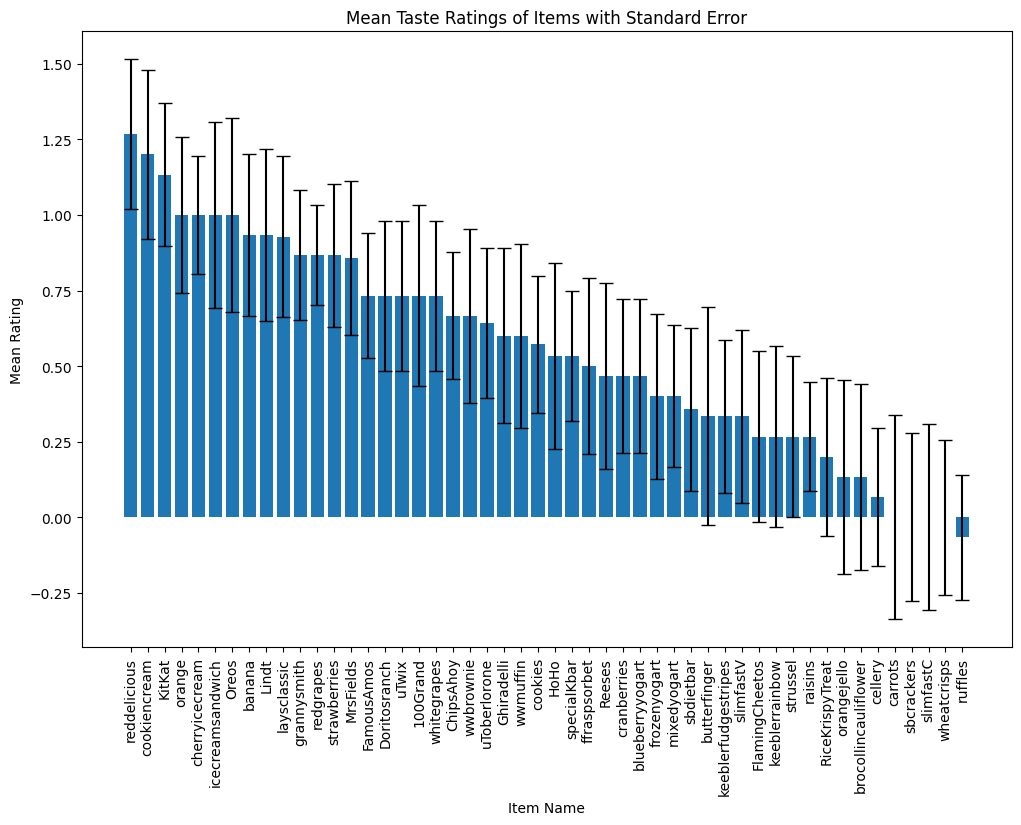

In [13]:
plt.figure(figsize=(12, 8))
plt.bar(combined_group_taste['Item_name'], combined_group_taste['mean_rating'], yerr=combined_group_taste['std_error'], capsize=5)
plt.xticks(rotation=90)
plt.xlabel('Item Name')
plt.ylabel('Mean Rating')
plt.title('Mean Taste Ratings of Items with Standard Error')
plt.show()

In [14]:
max_rating = combined_group_taste[combined_group_taste['mean_rating'] == combined_group_taste['mean_rating'].max()]
min_rating = combined_group_taste[combined_group_taste['mean_rating'] == combined_group_taste['mean_rating'].min()]
max_rating

,Item_name,mean_rating,std_rating,count,std_error
0,reddelicious,1.266667,0.96115,15,0.248168


In [15]:
min_rating

,Item_name,mean_rating,std_rating,count,std_error
49,ruffles,-0.066667,0.798809,15,0.206252


# Health

In [16]:
combined_group_health = combined_df_health.groupby('stim')['coded_response'].agg(['mean', 'std', 'count']).reset_index().sort_values('mean', ascending=False)
combined_group_health['std_error'] = combined_group_health['std'] / np.sqrt(combined_group_health['count'])
combined_group_health.columns = ['Item_name', 'mean_rating', 'std_rating', 'count', 'std_error']
combined_group_health.reset_index(drop=True, inplace=True)
combined_group_health

,Item_name,mean_rating,std_rating,count,std_error
0,grannysmith,1.642857,0.744946,14,0.199095
1,banana,1.533333,0.833809,15,0.215289
2,reddelicious,1.466667,0.915475,15,0.236375
3,orange,1.400000,0.985611,15,0.254484
4,whitegrapes,1.333333,0.723747,15,0.186871
5,strawberries,1.266667,0.961150,15,0.248168
6,redgrapes,1.000000,1.240347,14,0.331497
7,cranberries,0.928571,0.916875,14,0.245045
8,brocollincauliflower,0.846154,0.898717,13,0.249259
9,raisins,0.642857,1.215739,14,0.324920


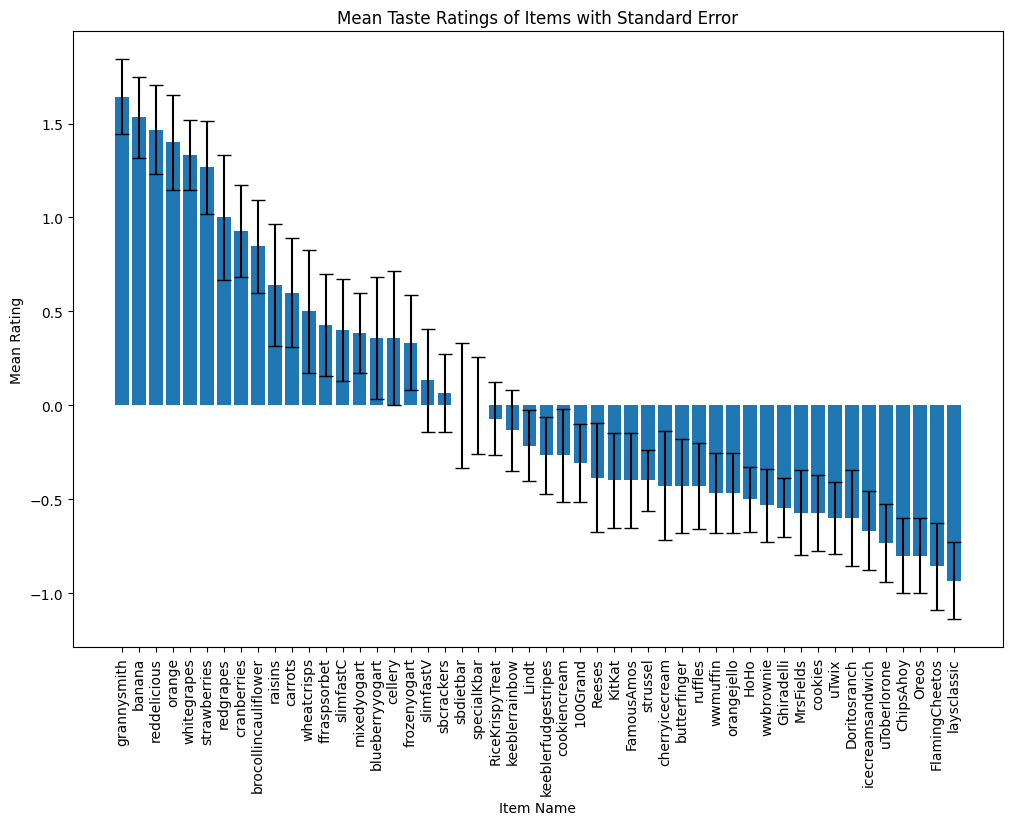

In [17]:
plt.figure(figsize=(12, 8))
plt.bar(combined_group_health['Item_name'], combined_group_health['mean_rating'], yerr=combined_group_health['std_error'], capsize=5)
plt.xticks(rotation=90)
plt.xlabel('Item Name')
plt.ylabel('Mean Rating')
plt.title('Mean Taste Ratings of Items with Standard Error')
plt.show()

In [18]:
max_rating = combined_group_health[combined_group_health['mean_rating'] == combined_group_health['mean_rating'].max()]
min_rating = combined_group_health[combined_group_health['mean_rating'] == combined_group_health['mean_rating'].min()]
max_rating

,Item_name,mean_rating,std_rating,count,std_error
0,grannysmith,1.642857,0.744946,14,0.199095


In [19]:
min_rating

,Item_name,mean_rating,std_rating,count,std_error
49,laysclassic,-0.933333,0.798809,15,0.206252
